# Test OSMnx

In [30]:
import osmnx as ox
import pandas as pd

import geopandas as gpd
from shapely import wkt

from shapely.geometry import Point


import matplotlib.pyplot as plt
from geopandas.tools import sjoin

In [31]:
ox.config(use_cache=True, log_console=True)

/var/folders/ly/rt519r9j7sx5syy44_l85hz80000gn/T/ipykernel_92697/3742396485.py:1: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


In [32]:
# Get the driveable street network for Manhattan
place_name = "Manhattan, New York City, New York, USA"
graph = ox.graph_from_place(place_name, network_type='walk', simplify=True, retain_all=True)


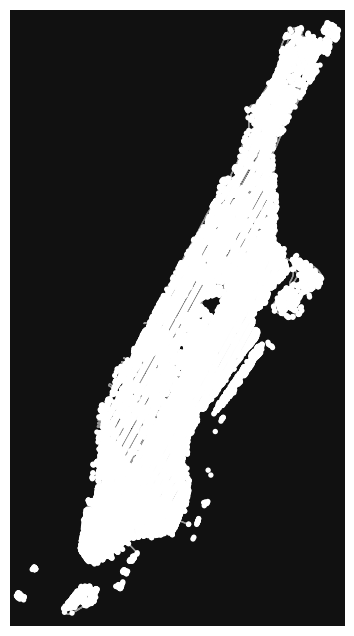

In [33]:
# Plot the street network
fig, ax = ox.plot_graph(graph)

In [34]:
import matplotlib.pyplot as plt
# Save the figure as an SVG file
plt.savefig("graph.svg", format="svg")

<Figure size 640x480 with 0 Axes>

In [35]:
nodes, edges = ox.graph_to_gdfs(graph)


In [36]:
print(nodes)

                     y          x  street_count          highway  ref  \
osmid                                                                   
30807314     40.790720 -73.963576             4              NaN  NaN   
30978752     40.774776 -73.974360             4              NaN  NaN   
42421728     40.798048 -73.960044             3  traffic_signals  NaN   
42421731     40.798654 -73.961474             4  traffic_signals  NaN   
42421737     40.799244 -73.962873             4  traffic_signals  NaN   
...                ...        ...           ...              ...  ...   
10966418754  40.690644 -74.045780             5              NaN  NaN   
10966418762  40.690510 -74.045611             3              NaN  NaN   
10966418767  40.690530 -74.045786             3              NaN  NaN   
10966418768  40.690633 -74.045584             3              NaN  NaN   
10966418769  40.689714 -74.044943             3              NaN  NaN   

                               geometry  
osmid   

In [37]:
nodes["highway"].unique()

array([nan, 'traffic_signals', 'crossing', 'stop', 'turning_circle',
       'motorway_junction', 'turning_loop', 'give_way', 'elevator',
       'bus_stop'], dtype=object)

In [38]:
nodes_smaller = nodes[nodes['highway'].isna()]

In [39]:
nodes_smaller

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
30807314,40.790720,-73.963576,4,NaN,NaN,POINT (-73.96358 40.79072)
30978752,40.774776,-73.974360,4,NaN,NaN,POINT (-73.97436 40.77478)
42421751,40.802268,-73.970050,4,NaN,NaN,POINT (-73.97005 40.80227)
42421778,40.785592,-73.982004,3,NaN,NaN,POINT (-73.98200 40.78559)
42421785,40.858744,-73.930122,3,NaN,NaN,POINT (-73.93012 40.85874)
...,...,...,...,...,...,...
10966418754,40.690644,-74.045780,5,NaN,NaN,POINT (-74.04578 40.69064)
10966418762,40.690510,-74.045611,3,NaN,NaN,POINT (-74.04561 40.69051)
10966418767,40.690530,-74.045786,3,NaN,NaN,POINT (-74.04579 40.69053)


In [40]:
edges

osmid    highway  oneway reversed   length  \
u           v           key                                                    
30807314    4332491202  0     147089927       path   False     True   12.695   
            2057103273  0      46613689  bridleway   False    False  159.255   
            6579409036  0      46613689  bridleway   False     True   58.144   
            1203806263  0     147089927       path   False    False   28.607   
30978752    4257949514  0     426425334    footway   False    False    5.799   
...                                 ...        ...     ...      ...      ...   
10966418768 10966418762 0    1180777644    footway   False    False   15.260   
            10966418754 0    1180777644    footway   False     True   19.230   
10966418769 8262932457  0      32965472    footway   False    False   43.660   
            371241566   0      32965472    footway   False     True   99.042   
            10966418762 0    1180777648    footway   False     True  104.891   

                                                                      geometry  \
u           v           key                                                      
30807314    4332491202  0    LINESTRING (-73.96358 40.79072, -73.96368 40.7...   
            2057103273  0    LINESTRING (-73.96358 40.79072, -73.96360 40.7...   
            6579409036  0    LINESTRING (-73.96358 40.79072, -73.96354 40.7...   
            1203806263  0    LINESTRING (-73.96358 40.79072, -73.96353 40.7...   
30978752    4257949514  0    LINESTRING (-73.97436 40.77478, -73.97441 40.7...   
...                                                                        ...   
10966418768 10966418762 0    LINESTRING (-74.04558 40.69063, -74.04558 40.6...   
            10966418754 0    LINESTRING (-74.04558 40.69063, -74.04560 40.6...   
10966418769 8262932457  0    LINESTRING (-74.04494 40.68971, -74.04471 40.6...   
            371241566   0    LINESTRING (-74.04494 40.68971, -74.04516 40.6...   
            10966418762 0    LINESTRING (-74.04494 40.68971, -74.04548 40.6...   

                                              name maxspeed lanes  ref  \
u           v           key                                              
30807314    4332491202  0                      NaN      NaN   NaN  NaN   
            2057103273  0                      NaN      NaN   NaN  NaN   
            6579409036  0                      NaN      NaN   NaN  NaN   
            1203806263  0                      NaN      NaN   NaN  NaN   
30978752    4257949514  0    Central Park Driveway      NaN   NaN  NaN   
...                                            ...      ...   ...  ...   
10966418768 10966418762 0                      NaN      NaN   NaN  NaN   
            10966418754 0                      NaN      NaN   NaN  NaN   
10966418769 8262932457  0                      NaN      NaN   NaN  NaN   
            371241566   0                      NaN      NaN   NaN  NaN   
            10966418762 0                      NaN      NaN   NaN  NaN   

                            service access tunnel width bridge junction  \
u           v           key                                               
30807314    4332491202  0       NaN    NaN    NaN   NaN    NaN      NaN   
            2057103273  0       NaN    NaN    NaN   NaN    NaN      NaN   
            6579409036  0       NaN    NaN    NaN   NaN    NaN      NaN   
            1203806263  0       NaN    NaN    NaN   NaN    NaN      NaN   
30978752    4257949514  0       NaN    NaN    NaN   NaN    NaN      NaN   
...                             ...    ...    ...   ...    ...      ...   
10966418768 10966418762 0       NaN    NaN    NaN   NaN    NaN      NaN   
            10966418754 0       NaN    NaN    NaN   NaN    NaN      NaN   
10966418769 8262932457  0       NaN    NaN    NaN   NaN    NaN      NaN   
            371241566   0       NaN    NaN    NaN   NaN    NaN      NaN   
            10966418762 0       NaN    NaN    NaN   NaN    NaN 

In [41]:
edges.columns

Index(['osmid', 'highway', 'oneway', 'reversed', 'length', 'geometry', 'name',
       'maxspeed', 'lanes', 'ref', 'service', 'access', 'tunnel', 'width',
       'bridge', 'junction', 'est_width', 'area'],
      dtype='object')

In [42]:
unique_values = edges['highway'].apply(str).unique()
print(unique_values)


['path' 'bridleway' 'footway' 'secondary' 'residential' 'primary'
 'tertiary' "['footway', 'steps']" 'service' 'trunk' 'unclassified'
 "['footway', 'pedestrian']" "['residential', 'primary']"
 "['residential', 'secondary']" 'pedestrian' 'tertiary_link'
 'living_street' 'secondary_link' 'primary_link' 'steps'
 "['residential', 'steps']" "['unclassified', 'secondary']" 'trunk_link'
 "['service', 'footway']" "['residential', 'tertiary']" 'track'
 "['path', 'footway']" "['residential', 'trunk']"
 "['secondary', 'primary']" "['residential', 'footway']"
 "['unclassified', 'secondary_link']" "['unclassified', 'tertiary']"
 "['path', 'steps']" "['footway', 'steps', 'pedestrian']"
 "['service', 'secondary_link']" "['unclassified', 'residential']"
 "['residential', 'path']" "['secondary', 'secondary_link']"
 "['path', 'track']" "['path', 'footway', 'steps']"
 "['residential', 'unclassified']" "['primary', 'primary_link']"
 "['residential', 'service']" "['unclassified', 'pedestrian']"
 "['steps',

In [43]:
flattened = [item for sublist in edges['highway'].tolist() for item in sublist]
unique_values = pd.unique(flattened)
print(unique_values)

['p' 'a' 't' 'h' 'b' 'r' 'i' 'd' 'l' 'e' 'w' 'y' 'f' 'o' 's' 'c' 'n' 'm'
 'footway' 'steps' 'v' 'u' 'k' 'pedestrian' 'residential' 'primary'
 'secondary' '_' 'g' 'unclassified' 'service' 'tertiary' 'path' 'trunk'
 'secondary_link' 'track' 'primary_link' 'corridor' 'elevator']


In [44]:
nodes.columns

Index(['y', 'x', 'street_count', 'highway', 'ref', 'geometry'], dtype='object')

In [45]:
nodes_manhatten = nodes.drop(['highway'], axis=1)

In [46]:
streets_manhatten = edges.drop(['oneway', 'reversed', 'length', 'name',
       'maxspeed', 'lanes', 'ref', 'service', 'access', 'tunnel', 'width',
       'bridge', 'junction', 'est_width', 'area'], axis=1)

In [47]:
print(streets_manhatten.head())

                             osmid    highway  \
u        v          key                         
30807314 4332491202 0    147089927       path   
         2057103273 0     46613689  bridleway   
         6579409036 0     46613689  bridleway   
         1203806263 0    147089927       path   
30978752 4257949514 0    426425334    footway   

                                                                  geometry  
u        v          key                                                     
30807314 4332491202 0    LINESTRING (-73.96358 40.79072, -73.96368 40.7...  
         2057103273 0    LINESTRING (-73.96358 40.79072, -73.96360 40.7...  
         6579409036 0    LINESTRING (-73.96358 40.79072, -73.96354 40.7...  
         1203806263 0    LINESTRING (-73.96358 40.79072, -73.96353 40.7...  
30978752 4257949514 0    LINESTRING (-73.97436 40.77478, -73.97441 40.7...  


## Taxizone Data


In [48]:
taxi_zones_df = pd.read_csv('taxi_zones.csv')
taxi_zones_df.shape

(263, 7)

In [49]:
taxi_zones_df = taxi_zones_df[taxi_zones_df['the_geom'].str.startswith('MULTIPOLYGON')]
taxi_zones_df = taxi_zones_df[taxi_zones_df['the_geom'].str.endswith(')))')]
taxi_zones_df = taxi_zones_df[taxi_zones_df['borough'].str.startswith('Manhattan')]
#taxi_zones_df['the_geom'] = taxi_zones_df['the_geom'].astype(str)

In [50]:
taxi_zones_df.shape

(69, 7)

In [51]:
taxi_zones_df.head(10)

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
3,4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,4,Manhattan
9,24,0.047000,MULTIPOLYGON (((-73.95953658899997 40.79871852...,0.000061,Bloomingdale,24,Manhattan
12,12,0.036661,MULTIPOLYGON (((-74.01565756599994 40.70483308...,0.000042,Battery Park,12,Manhattan
13,13,0.050281,MULTIPOLYGON (((-74.01244109299991 40.71905767...,0.000149,Battery Park City,13,Manhattan
40,41,0.052793,MULTIPOLYGON (((-73.94773985499985 40.80959972...,0.000143,Central Harlem,41,Manhattan
41,45,0.045907,MULTIPOLYGON (((-73.99750445299988 40.71406913...,0.000091,Chinatown,45,Manhattan
43,42,0.092709,MULTIPOLYGON (((-73.93436121591056 40.83620061...,0.000264,Central Harlem North,42,Manhattan
44,43,0.099739,MULTIPOLYGON (((-73.97255352299985 40.76489773...,0.000380,Central Park,43,Manhattan
47,48,0.043747,MULTIPOLYGON (((-73.99117738199989 40.75532984...,0.000094,Clinton East,48,Manhattan
49,50,0.055748,MULTIPOLYGON (((-73.99667705784736 40.77351005...,0.000173,Clinton West,50,Manhattan


In [52]:
print(taxi_zones_df["the_geom"][3])
print("")


MULTIPOLYGON (((-73.97177410965318 40.72582128133706, -73.97179142961485 40.72581422114911, -73.97181650587731 40.72581496675257, -73.97185935830923 40.72558296903031, -73.97187437695213 40.72550311607975, -73.97188490951473 40.725424405065766, -73.97191120732053 40.72529037069992, -73.97193374501082 40.72517629035117, -73.97193975456328 40.725158038610054, -73.97196154778591 40.725039978810884, -73.97200511841213 40.72484148970817, -73.97203666966882 40.724684070020096, -73.97206595867397 40.72455915832874, -73.97207196960339 40.724536350858095, -73.97208098151926 40.72449756793038, -73.97208400057282 40.72446790554567, -73.97209751290906 40.72442341523472, -73.97215609001734 40.7241701782781, -73.97216585996632 40.724131963273145, -73.9722169237619 40.723930054646765, -73.97223344676958 40.723846779926305, -73.97226499868246 40.72371445733361, -73.97232507731592 40.723463499327295, -73.97236115744644 40.72331206047645, -73.97239945748277 40.72314881636663, -73.97251011180381 40.72269

In [53]:
#len(taxi_zones_df["the_geom"][1])

In [54]:
# Convert strings to geometry
#taxi_zones_df['the_geom'] = taxi_zones_df['the_geom'].apply(wkt.loads)
def safe_loads(row):
    try:
        return wkt.loads(row)
    except Exception:
        print(f"Error parsing row: {row}")
        return None  # or some other value

taxi_zones_df['the_geom'] = taxi_zones_df['the_geom'].apply(safe_loads)


In [55]:
# Convert the DataFrame into a GeoDataFrame
gdf_taxi_zone = gpd.GeoDataFrame(taxi_zones_df[["LocationID", "the_geom"]], geometry='the_geom')

print(gdf_taxi_zone.head())

    LocationID                                           the_geom
3            4  MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...
9           24  MULTIPOLYGON (((-73.95954 40.79872, -73.96004 ...
12          12  MULTIPOLYGON (((-74.01566 40.70483, -74.01540 ...
13          13  MULTIPOLYGON (((-74.01244 40.71906, -74.01282 ...
40          41  MULTIPOLYGON (((-73.94774 40.80960, -73.94506 ...


In [56]:
gdf_taxi_zone = gdf_taxi_zone.rename(columns={'LocationID': 'Taxi_Zone_ID'})


<Axes: >

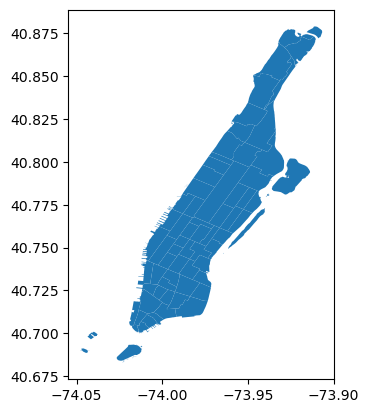

In [57]:
gdf_taxi_zone.plot()

## Merge Taxi + street node

I have two geopanda geodataframes. One contains streets with LINESTRING and the other zones with MULTIPOLYGON as geometry. Can you create a new df that maps the streets into the zones. The street should be mapped to a zone if the LINESTRING is within the MULTIPOLYGON, a street can be in multiple zones and there are multiple streets in a zone

In [58]:
gdf_taxi_zone = gdf_taxi_zone.set_crs("epsg:4326")
gdf_taxi_zone = gdf_taxi_zone.to_crs(gdf_taxi_zone.crs)

print(edges.crs)
print(gdf_taxi_zone.crs)

epsg:4326
epsg:4326


In [66]:
# Perform spatial join
street_zones = gpd.sjoin(streets_manhatten, gdf_taxi_zone, how="left", op='intersects')

# Save the output as a new shapefile (optional)
print(street_zones.head())
print(street_zones.shape)

/Users/florian/opt/anaconda3/envs/ox/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


                             osmid    highway  \
u        v          key                         
30807314 4332491202 0    147089927       path   
         2057103273 0     46613689  bridleway   
         6579409036 0     46613689  bridleway   
         1203806263 0    147089927       path   
30978752 4257949514 0    426425334    footway   

                                                                  geometry  \
u        v          key                                                      
30807314 4332491202 0    LINESTRING (-73.96358 40.79072, -73.96368 40.7...   
         2057103273 0    LINESTRING (-73.96358 40.79072, -73.96360 40.7...   
         6579409036 0    LINESTRING (-73.96358 40.79072, -73.96354 40.7...   
         1203806263 0    LINESTRING (-73.96358 40.79072, -73.96353 40.7...   
30978752 4257949514 0    LINESTRING (-73.97436 40.77478, -73.97441 40.7...   

                         index_right  Taxi_Zone_ID  
u        v          key                             
308

In [67]:
len(street_zones["Taxi_Zone_ID"].unique())

68

In [68]:
street_zones.isnull().sum()

osmid             0
highway           0
geometry          0
index_right     536
Taxi_Zone_ID    536
dtype: int64

In [69]:
nan_rows = street_zones[street_zones['Taxi_Zone_ID'].isnull()]
nan_rows

osmid  highway  \
u           v           key                                     
1163094683  3350584938  0                  328246652  footway   
            1163094715  0                  328281886  footway   
            3351125055  0                 1169896427  footway   
            1163094738  0    [1169896428, 100606733]  footway   
1163094715  1163094683  0                  328281886  footway   
...                                              ...      ...   
10942341506 10942320699 0                 1177911652  footway   
10942341511 10942341515 0                 1177911655  footway   
            10942341518 0                 1177911656  footway   
10942341515 10942341511 0                 1177911655  footway   
10942341518 10942341511 0                 1177911656  footway   

                                                                      geometry  \
u           v           key                                                      
1163094683  3350584938  0    LINESTRING (-73.99703 40.70145, -73.99690 40.7...   
            1163094715  0    LINESTRING (-73.99703 40.70145, -73.99676 40.7...   
            3351125055  0    LINESTRING (-73.99703 40.70145, -73.99693 40.7...   
            1163094738  0    LINESTRING (-73.99703 40.70145, -73.99718 40.7...   
1163094715  1163094683  0    LINESTRING (-73.99662 40.70147, -73.99676 40.7...   
...                                                                        ...   
10942341506 10942320699 0    LINESTRING (-74.00573 40.70320, -74.00582 40.7...   
10942341511 10942341515 0    LINESTRING (-74.00618 40.70350, -74.00618 40.7...   
            10942341518 0    LINESTRING (-74.00618 40.70350, -74.00618 40.7...   
10942341515 10942341511 0    LINESTRING (-74.00617 40.70360, -74.00627 40.7...   
10942341518 10942341511 0    LINESTRING (-74.00607 40.70347, -74.00616 40.7...   

                             index_right  Taxi_Zone_ID  
u           v           key                             
1163094683  3350584938  0            NaN           NaN  
            1163094715  0            NaN           NaN  
            3351125055  0            NaN           NaN  
            1163094738  0            NaN           NaN  
1163094715  1163094683  0            NaN           NaN  
...                                  ...           ...  
10942341506 10942320699 0            NaN           NaN  
10942341511 10942341515 0            NaN           NaN  
            10942341518 0            NaN           NaN  
10942341515 10942341511 0            NaN           NaN  
10942341518 10942341511 0            NaN           NaN  

[536 rows x 5 columns]

In [72]:
street_zones = street_zones.dropna(subset=['index_right','Taxi_Zone_ID'])
print(street_zones.shape)

(159226, 5)


In [79]:
street_zones['geometry'].dtype

In [84]:
street_zones["highway"] = street_zones["highway"].apply(str)
street_zones['osmid'] = street_zones['osmid'].astype(str)
street_zones['geometry'] = street_zones['geometry'].astype(object)


/Users/florian/opt/anaconda3/envs/ox/lib/python3.11/site-packages/geopandas/geodataframe.py:1537: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


In [85]:
street_zones

osmid    highway  \
u           v           key                          
30807314    4332491202  0     147089927       path   
            2057103273  0      46613689  bridleway   
            6579409036  0      46613689  bridleway   
            1203806263  0     147089927       path   
30978752    4257949514  0     426425334    footway   
...                                 ...        ...   
10966418768 10966418762 0    1180777644    footway   
            10966418754 0    1180777644    footway   
10966418769 8262932457  0      32965472    footway   
            371241566   0      32965472    footway   
            10966418762 0    1180777648    footway   

                                                                      geometry  \
u           v           key                                                      
30807314    4332491202  0    LINESTRING (-73.963576 40.79072, -73.963678 40...   
            2057103273  0    LINESTRING (-73.963576 40.79072, -73.963602 40...   
            6579409036  0    LINESTRING (-73.963576 40.79072, -73.963544 40...   
            1203806263  0    LINESTRING (-73.963576 40.79072, -73.963526 40...   
30978752    4257949514  0    LINESTRING (-73.97436 40.774776, -73.974413 40...   
...                                                                        ...   
10966418768 10966418762 0    LINESTRING (-74.045584 40.690633, -74.045578 4...   
            10966418754 0    LINESTRING (-74.045584 40.690633, -74.045604 4...   
10966418769 8262932457  0    LINESTRING (-74.044942 40.689714, -74.044708 4...   
            371241566   0    LINESTRING (-74.044942 40.689714, -74.045165 4...   
            10966418762 0    LINESTRING (-74.044942 40.689714, -74.045481 4...   

                             index_right  Taxi_Zone_ID  
u           v           key                             
30807314    4332491202  0           44.0          43.0  
            2057103273  0           44.0          43.0  
            6579409036  0           44.0          43.0  
            1203806263  0           44.0          43.0  
30978752    4257949514  0           44.0          43.0  
...                                  ...           ...  
10966418768 10966418762 0          103.0         103.0  
            10966418754 0          103.0         103.0  
10966418769 8262932457  0          103.0         103.0  
            371241566   0          103.0         103.0  
            10966418762 0          103.0         103.0  

[159226 rows x 5 columns]

In [86]:
street_zones.to_parquet('street_zones.parquet', engine='pyarrow')

In [88]:
street_zones['geometry'] = street_zones['geometry'].apply(safe_loads)
street_zones['geometry'] = gpd.GeoSeries(street_zones['geometry'])

### Bike data

In [101]:
bike_df = pd.read_csv('stationID_geoloaction.csv')
bike_df.shape

(839, 3)

In [102]:
print(bike_df.head())

   Unnamed: 0                  GeoLocation  station id
0      674060  [ 40.74275383 -74.00747359]      3472.0
1        6387  [ 40.73172428 -74.00674436]       127.0
2       75008  [ 40.73331967 -73.99510132]       280.0
3      439913  [ 40.74311555 -73.98215353]       540.0
4      523068  [ 40.77492513 -73.98266566]      3159.0


In [103]:
bike_df.shape

(839, 3)

In [104]:
bike_df.sort_values('GeoLocation')

,Unnamed: 0,GeoLocation,station id
757,560679,[ 40.64653837 -74.01658773],3239.0
729,675567,[ 40.65539977 -74.01062787],3477.0
763,788863,[ 40.65659567 -74.00849283],3487.0
662,675822,[ 40.65708867 -74.00870204],3478.0
781,1824047,[ 40.66065237 -73.96459043],3685.0
...,...,...,...
245,690614,[ 40.8143256 -73.9590255],3547.0
744,714465,[ 40.81439444 -73.95324737],3649.0
800,1395009,[ 40.863 -73.902],NaN
742,714508,[ 45.50626419 -73.56890559],3650.0


In [105]:
#drop false rows:

bike_df = bike_df.drop(bike_df.index[[742, 790, 800]])

In [106]:
def convert_to_wkt(coord_str):
    # remove brackets and split string into lat and lon
    lat, lon = map(float, coord_str.strip(' []').split())
    # create point and return wkt
    point = Point(lon, lat)
    return point.wkt

# apply the function to the GeoLocation column
bike_df['GeoLocation'] = bike_df['GeoLocation'].apply(convert_to_wkt)

In [107]:
bike_df['GeoLocation'] = bike_df['GeoLocation'].apply(safe_loads)

gdf_bike_df = gpd.GeoDataFrame(bike_df[["station id", "GeoLocation"]], geometry='GeoLocation')

print(gdf_bike_df.shape)

(836, 2)


In [108]:
gdf_bike_df.head()

,station id,GeoLocation
0,3472.0,POINT (-74.00747 40.74275)
1,127.0,POINT (-74.00674 40.73172)
2,280.0,POINT (-73.99510 40.73332)
3,540.0,POINT (-73.98215 40.74312)
4,3159.0,POINT (-73.98267 40.77493)


<Axes: >

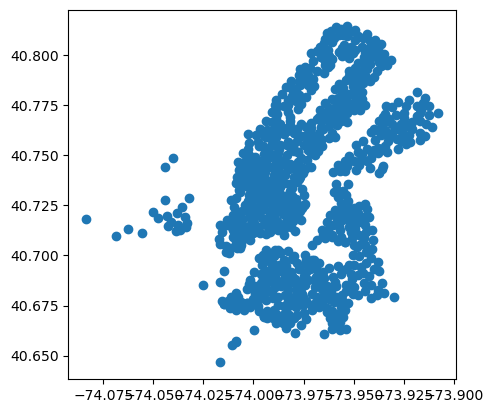

In [109]:
gdf_bike_df.plot()

### Volume Segment ID

In [110]:
volume_df = pd.read_csv('volume_SegmentID-Geolocation.csv')
volume_df.shape

(371, 3)

In [111]:
print(volume_df.head())

   Unnamed: 0  SegmentID                               Coordinates
0           0      70896   (-73.93915023590672, 40.84003811194584)
1           1      33615    (-73.997179301792, 40.762398908462565)
2           2      33411   (-74.00495424814217, 40.75170880559713)
3           3      33968  (-73.98720284497887, 40.760779305883766)
4           4      33850  (-73.99042394665165, 40.761456779413706)


In [112]:
def convert_to_wkt(coord_str):
    # remove brackets and split string into lat and lon
    lon, lat = map(float, coord_str.strip(' ()').split(", "))
    # create point and return wkt
    point = Point(lon, lat)
    return point.wkt

# apply the function to the GeoLocation column
volume_df['Coordinates'] = volume_df['Coordinates'].apply(convert_to_wkt)

In [113]:
volume_df['Coordinates'] = volume_df['Coordinates'].apply(safe_loads)

gdf_volume_df = gpd.GeoDataFrame(volume_df[["SegmentID", "Coordinates"]], geometry='Coordinates')

print(gdf_volume_df.shape)

(371, 2)


### Merging table

In [114]:
gdf_bike_df = gdf_bike_df.set_crs("epsg:4326")
gdf_bike_df = gdf_bike_df.to_crs(gdf_bike_df.crs)

gdf_volume_df = gdf_volume_df.set_crs("epsg:4326")
gdf_volume_df = gdf_volume_df.to_crs(gdf_volume_df.crs)

print(gdf_bike_df.crs)
print(gdf_taxi_zone.crs)
print(gdf_volume_df.crs)

epsg:4326
epsg:4326
epsg:4326


In [115]:
# Perform spatial join
bike_zones = gpd.sjoin(gdf_taxi_zone, gdf_bike_df, how="inner", op='intersects')

print(bike_zones.head())
print(bike_zones.shape)

   Taxi_Zone_ID                                           the_geom  \
3             4  MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...   
3             4  MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...   
3             4  MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...   
3             4  MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...   
3             4  MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...   

   index_right  station id  
3           87       302.0  
3          458       150.0  
3          573       411.0  
3          509       393.0  
3          260       266.0  
(448, 4)


/Users/florian/opt/anaconda3/envs/ox/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [116]:
bike_zones = bike_zones.drop(['the_geom', 'index_right'], axis=1)

# Reset the index
bike_zones = bike_zones.reset_index(drop=True)

In [117]:
bike_zones.head()
bike_zones.to_csv('bike-zone.csv', index=False)

In [118]:
volume_zones = gpd.sjoin(gdf_taxi_zone, gdf_volume_df, how="inner", op='intersects')

print(volume_zones.head())
print(volume_zones.shape)

   Taxi_Zone_ID                                           the_geom  \
3             4  MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...   
3             4  MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...   
3             4  MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...   
9            24  MULTIPOLYGON (((-73.95954 40.79872, -73.96004 ...   
9            24  MULTIPOLYGON (((-73.95954 40.79872, -73.96004 ...   

   index_right  SegmentID  
3           92      34607  
3           82      33218  
3          104    9000789  
9          321      38311  
9          283    8101300  
(344, 4)


/Users/florian/opt/anaconda3/envs/ox/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [119]:
volume_zones = volume_zones.drop(['the_geom', 'index_right'], axis=1)

# Reset the index
volume_zones = volume_zones.reset_index(drop=True)

In [120]:
volume_zones.to_csv('volume_zone.csv', index=False)

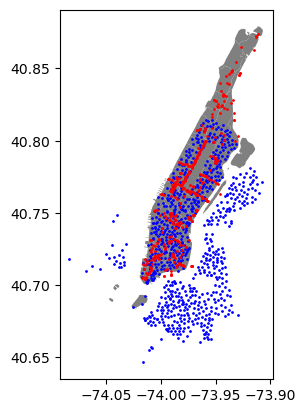

In [121]:
fig, ax = plt.subplots(1, 1)

# Plot zaxi zone
gdf_taxi_zone.plot(ax=ax, color='grey')

# Plot bike stations
gdf_bike_df.plot(ax=ax, color='blue', markersize=1)

# Plot volume data
gdf_volume_df.plot(ax=ax, color='red', markersize=1)

plt.show()

## Speed Data Mapping

In [131]:
speed_df = pd.read_parquet("ID_location")
speed_df.head()

,COORDINATES,LINK_ID
0,"[-73.974651, 40.7369006]",4616329
1,"[-73.99944, 40.7081105]",4616342
2,"[-73.997531, 40.75829]",4329472
3,"[-73.99724, 40.75719]",4329507
4,"[-73.99687, 40.75766]",4329508


In [132]:
longest_str_index = speed_df['COORDINATES'].str.len().idxmax()
longest_str = speed_df.loc[longest_str_index, 'COORDINATES']
print(longest_str)

[-73.974651   40.7369006]


In [133]:
def convert_to_wkt(coord):
    # check if coord is a string, if so convert to list
    if isinstance(coord, str):
        coord = coord.strip(' []').split(', ')
    lon, lat = map(float, coord)
    # create point and return wkt
    point = Point(lon, lat)
    return point.wkt

# apply the function to the COORDINATES column
speed_df['COORDINATES'] = speed_df['COORDINATES'].apply(convert_to_wkt)

In [134]:
speed_df.head()

,COORDINATES,LINK_ID
0,POINT (-73.974651 40.7369006),4616329
1,POINT (-73.99944 40.7081105),4616342
2,POINT (-73.997531 40.75829),4329472
3,POINT (-73.99724 40.75719),4329507
4,POINT (-73.99687 40.75766),4329508


In [135]:
speed_df.drop_duplicates(inplace=True)
speed_df.shape

(26, 2)

In [136]:
speed_df['COORDINATES'] = speed_df['COORDINATES'].apply(safe_loads)

gdf_speed_df = gpd.GeoDataFrame(speed_df[["LINK_ID", "COORDINATES"]], geometry='COORDINATES')

print(gdf_speed_df.shape)

(26, 2)


In [137]:
speed_zones = gpd.sjoin(gdf_taxi_zone, gdf_speed_df, how="inner", op='intersects')

print(speed_zones.head())
print(speed_zones.shape)

    Taxi_Zone_ID                                           the_geom  \
41            45  MULTIPOLYGON (((-73.99750 40.71407, -73.99744 ...   
47            48  MULTIPOLYGON (((-73.99118 40.75533, -73.99163 ...   
47            48  MULTIPOLYGON (((-73.99118 40.75533, -73.99163 ...   
49            50  MULTIPOLYGON (((-73.99668 40.77351, -73.99434 ...   
49            50  MULTIPOLYGON (((-73.99668 40.77351, -73.99434 ...   

    index_right  LINK_ID  
41           14  4616341  
47            3  4329507  
47            4  4329508  
49         4127  4620343  
49          416  4616323  
(21, 4)


/Users/florian/opt/anaconda3/envs/ox/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/ly/rt519r9j7sx5syy44_l85hz80000gn/T/ipykernel_38617/566913310.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  speed_zones = gpd.sjoin(gdf_taxi_zone, gdf_speed_df, how="inner", op='intersects')


In [138]:
speed_zones = speed_zones.drop(['the_geom', 'index_right'], axis=1)

# Reset the index
speed_zones = speed_zones.reset_index(drop=True)

In [139]:
print(speed_zones.head())

   Taxi_Zone_ID  LINK_ID
0            45  4616341
1            48  4329507
2            48  4329508
3            50  4620343
4            50  4616323


In [140]:
speed_zones.to_parquet('speed_zones.parquet', engine='pyarrow')